In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import *
from scipy import linalg
from scipy import optimize
from scipy import stats
from tqdm.notebook import tqdm

In [83]:
data1 = pd.read_csv(r'/home/jin/다운로드/tf_data1.csv',header=0)
data2 = pd.read_csv(r'/home/jin/다운로드/FUlldata.csv',header=0)

ii = data2['tracer']== 'Ha'
jj = data2['tracer'] == 'HI'
cc = data2['tracer'] =='CO'

Ha_2 = data2.loc[ii]
Hl_2 = data2.loc[jj]
CO_2 = data2.loc[cc]

# M_B_0 , V_max_0 , V_err_0 , Object  = (data['M_B']).to_numpy()  ,(data['V_max']).to_numpy()  , data['V_err'].to_numpy() ,data['object'].to_numpy()

# M_B_0_Hl , V_max_0_Hl,V_err_0_Hl ,Object_Hl = (Hl_0['M_B']).to_numpy()  ,(Hl_0['V_max']).to_numpy()  , Hl_0['V_err'].to_numpy() , Hl_0['object'].to_numpy()
# M_B_0_Ha , V_max_0_Ha,V_err_0_Ha ,Object_Ha = (Ha_0['M_B']).to_numpy()  ,(Ha_0['V_max']).to_numpy()  , Ha_0['V_err'].to_numpy() , Ha_0['object'].to_numpy()
M_B_err_1 = (data1['MBerr']).to_numpy()
M_B_err_0 = (data2['M_B_err']).to_numpy()

M_err_0_Ha = (Ha_2['M_B_err']).to_numpy()
M_err_HI = (Hl_2['M_B_err']).to_numpy()
M_B_1 , V_max_1 , V_err_1  = (data1['Bmag']).to_numpy()  ,(data1['Vmax']).to_numpy()  , data1['error'].to_numpy()
M_B_0 , V_max_0 , V_err_0 , Object  = (data2['M_B']).to_numpy()  ,(data2['Vmax ']).to_numpy()  , data2['Vmax_err '].to_numpy() ,data2['target_name'].to_numpy()
M_B_HI , V_max_HI,V_err_HI ,Object_Hl_2 = (Hl_2['M_B']).to_numpy()  ,(Hl_2['Vmax ']).to_numpy()  , Hl_2['Vmax_err '].to_numpy() , Hl_2['target_name'].to_numpy()
M_B_0_Ha , V_max_0_Ha,V_err_0_Ha ,Object_Ha_2 = (Ha_2['M_B']).to_numpy()  ,(Ha_2['Vmax ']).to_numpy()  , Ha_2['Vmax_err '].to_numpy() , Ha_2['target_name'].to_numpy()
M_B_CO , V_max_CO,V_err_CO ,Object_CO_2 = (CO_2['M_B']).to_numpy()  ,(CO_2['Vmax ']).to_numpy()  , CO_2['Vmax_err '].to_numpy() , CO_2['target_name'].to_numpy()

In [86]:
V_max_HA = np.concatenate((V_max_0_Ha, V_max_1))
M_B_HA = np.concatenate((M_B_0_Ha, M_B_1))

V_err_HA = np.concatenate((V_err_0_Ha,V_err_1))
M_err_HA = np.concatenate((M_err_0_Ha,M_B_err_1))

logV_err_0_Ha = np.log10(1 +V_err_0_Ha/V_max_0_Ha)
logV_err_HI = np.log10(1 +V_err_HI/V_max_HI)


V_max = np.concatenate((V_max_0, V_max_1))
M_B = np.concatenate((M_B_0, M_B_1))
V_err = np.concatenate((V_err_0,V_err_1))
M_err = np.concatenate((M_B_err_0,M_B_err_1))
# V_err_0
logV_err_0 = np.log10(1 +V_err_0/V_max_0)
logV_err_1 = np.log10(1 +V_err_1/V_max_1)
logV_err = np.concatenate((logV_err_0,logV_err_1))
logM_B_err_0 = np.log10(1 +M_B_err_0/M_B_0)
logM_B_err_1 = np.log10(1 +M_B_err_1/M_B_1)


logV_err_HA = np.concatenate((logV_err_0_Ha,logV_err_1))
logM_err=np.concatenate((logM_B_err_0,logM_B_err_1))

In [60]:
M_err = pd.DataFrame(M_err)
M_err

,0
0,1.3266
1,1.2750
2,1.2830
3,1.4050
4,1.4420
...,...
79,0.0900
80,0.0900
81,0.0900
82,0.0900


Text(0, 0.5, '$M_B$')

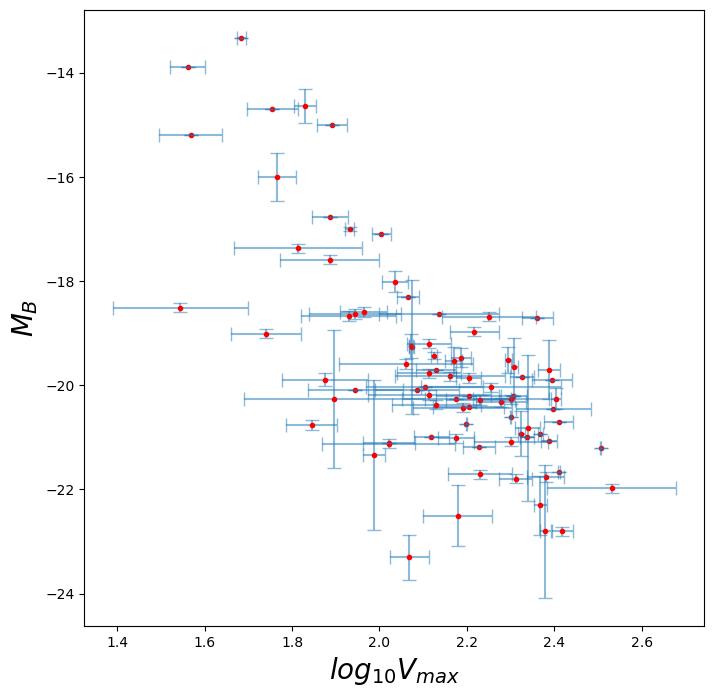

In [76]:
fig = plt.figure(1,figsize=(8,8))

plt.plot(np.log10(V_max), M_B ,'r.')
plt.errorbar(np.log10(V_max), M_B,xerr=logV_err,yerr=M_err,ls='',alpha=0.5,capsize=5)
# plt.errorbar(np.log10(V_max_0), M_B_0,xerr=logV_err_0,yerr =logM_B_err,ls='',alpha=0.5,capsize=5)
plt.xlabel(r'$log_{10}V_{max}$',fontsize=20)
plt.ylabel(r'$M_B$',fontsize=20)

plt.savefig('Total data ',dpi=400)

In [ ]:
# LS

Hl slope 3.7124944803156987
Ha slope 1.214753910553045


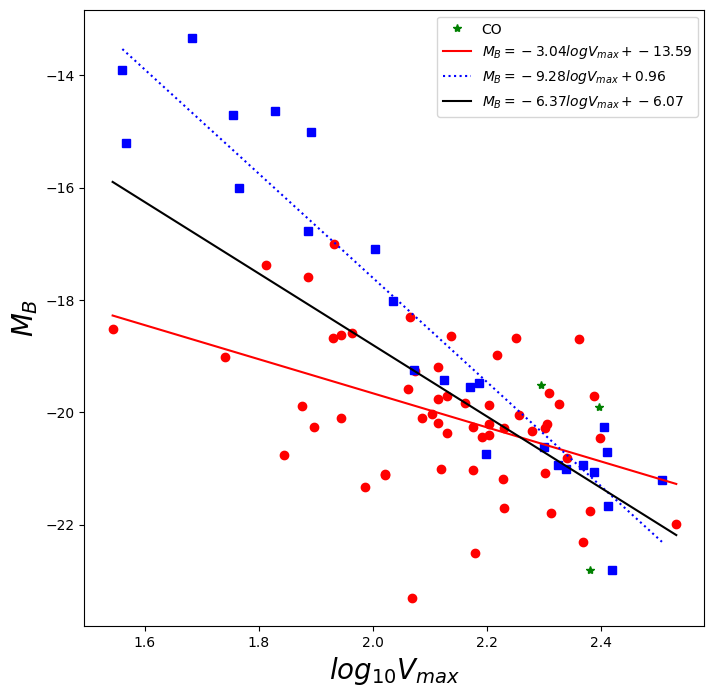

In [ ]:
fig = plt.figure(1,figsize=(8,8))

plt.plot(np.log10(V_max_HA), M_B_HA,'ro')
plt.plot(np.log10(V_max_HI), M_B_HI,'bs')
plt.plot(np.log10(V_max_CO), M_B_CO,'g*',label='CO')
# plt.errorbar(np.log10(V_max), M_B,xerr=logV_err ,ls='',alpha=0.5,capsize=0.1)
A_HA =np.vstack([np.log10(V_max_HA), np.ones(len(V_max_HA))]).T
b_HA = M_B_HA

w_Ha,chi2,ransk,s = linalg.lstsq(A_HA,b_HA)
xx = np.linspace(np.log10(V_max_HA).min(),np.log10(V_max_HA).max(),100)
yy = xx*w_Ha[0] + w_Ha[1]
plt.plot(xx,yy,'r-',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w_Ha[0],'{max}',w_Ha[1]))

A_HI =np.vstack([np.log10(V_max_HI), np.ones(len(V_max_HI))]).T
b_HI = M_B_HI
w_HI,chi2,ransk,s = linalg.lstsq(A_HI,b_HI)
xx = np.linspace(np.log10(V_max_HI).min(),np.log10(V_max_HI).max(),100)
yy = xx*w_HI[0] + w_HI[1]
plt.plot(xx,yy,'b:',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w_HI[0],'{max}',w_HI[1]))


A =np.vstack([np.log10(V_max), np.ones(len(V_max))]).T
b = M_B
w,chi2,ransk,s = linalg.lstsq(A,b)
xx = np.linspace(np.log10(V_max).min(),np.log10(V_max).max(),100)
yy = xx*w[0] + w[1]
plt.plot(xx,yy,'k',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w[0],'{max}',w[1]))


plt.legend()
plt.xlabel(r'$log_{10}V_{max}$',fontsize=20)
plt.ylabel(r'$M_B$',fontsize=20)



print('Hl slope',w_HI[0]/(-2.5))
print('Ha slope',w_Ha[0]/(-2.5))

plt.savefig('Resolut of TF non regard error ',dpi=400)

# Mc

In [114]:
NN = 100000
w_HA_s = np.zeros(NN)
w_HA_i=  np.zeros(NN)

w_HI_s = np.zeros(NN)
w_HI_i=  np.zeros(NN)

w_s = np.zeros(NN)
w_i=  np.zeros(NN)

for i in tqdm(range(NN)):
    New_Vmax_HA = np.zeros(len(V_max_HA))
    New_Vmax_HI = np.zeros(len(V_max_HI))
    New_Vmax = np.zeros(len(V_max))
    for ii, dV in enumerate(V_err_HA):
        delV = stats.norm.rvs(loc=0,scale=dV)
        if (V_max_HA[ii] + delV <=0 ):
              delV = delV*0.2
        New_Vmax_HA[ii]= V_max_HA[ii] + delV

    for ii, dV in enumerate(V_err_HI):
        delV = stats.norm.rvs(loc=0,scale=dV)
        if (V_max_HI[ii] + delV <=0 ):
              delV = delV*0.2
        New_Vmax_HI[ii]= V_max_HI[ii] + delV

    for ii, dV in enumerate(V_err):
        delV = stats.norm.rvs(loc=0,scale=dV)
        if (V_max[ii] + delV <=0 ):
              delV = delV*0.2               
        New_Vmax[ii]= V_max[ii] + delV

        
    New_M_B_HA = np.zeros(len(M_B_HA))
    New_M_B_HI = np.zeros(len(M_B_HI))
    New_MB = np.zeros(len(M_B))
    for ii, dM in enumerate(M_err_HA):
        delM = stats.norm.rvs(loc=0,scale=dM)
        New_M_B_HA[ii]= M_B_HA[ii] + delM

    for ii, dM in enumerate(M_err_HI):
        delV = stats.norm.rvs(loc=0,scale=dM)
        New_M_B_HI[ii]= M_B_HI[ii] + delM

    for ii, dM in enumerate(M_err):
        delV = stats.norm.rvs(loc=0,scale=dM)
        New_MB[ii]= M_B[ii] + delM
    
    A_HA =np.vstack([np.log10(New_Vmax_HA), np.ones(len(New_Vmax_HA))]).T
    b_HA =  New_M_B_HA

    w_Ha,chi2,ransk,s = linalg.lstsq(A_HA,b_HA)
    w_HA_s[i] = w_Ha[0]
    w_HA_i[i] = w_Ha[1]

    A_HI =np.vstack([np.log10(New_Vmax_HI), np.ones(len(New_Vmax_HI))]).T
    b_HI = New_M_B_HI
    w_HI,chi2,ransk,s = linalg.lstsq(A_HI,b_HI)
    w_HI_s[i] = w_HI[0]
    w_HI_i[i] = w_HI[1]


    A =np.vstack([np.log10(New_Vmax), np.ones(len(New_Vmax))]).T
    b = New_MB
    w,chi2,ransk,s = linalg.lstsq(A,b)
    w_s[i] = w[0]
    w_i[i] = w[1]



  0%|          | 0/100000 [00:00<?, ?it/s]

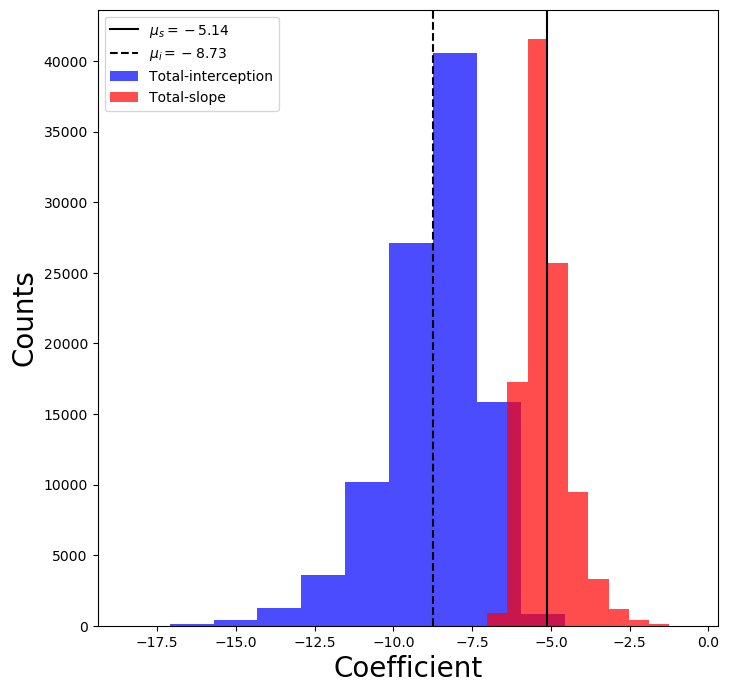

In [115]:
fig = plt.figure(1,figsize=(8,8))
plt.hist(w_i,color='b',alpha=0.7,label='Total-interception')
plt.hist(w_s,color='r',alpha=0.7,label='Total-slope')

plt.axvline(x=w_s.mean(),c='k',ls='-',label=r'$\mu_s = {:.2f}$'.format(w_s.mean()))
plt.axvline(x=w_i.mean(),c='k',ls='--',label=r'$\mu_i = {:.2f}$'.format(w_i.mean()))

plt.xlabel('Coefficient',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.legend()

plt.savefig('Histogram of total sig dv ',dpi=400)

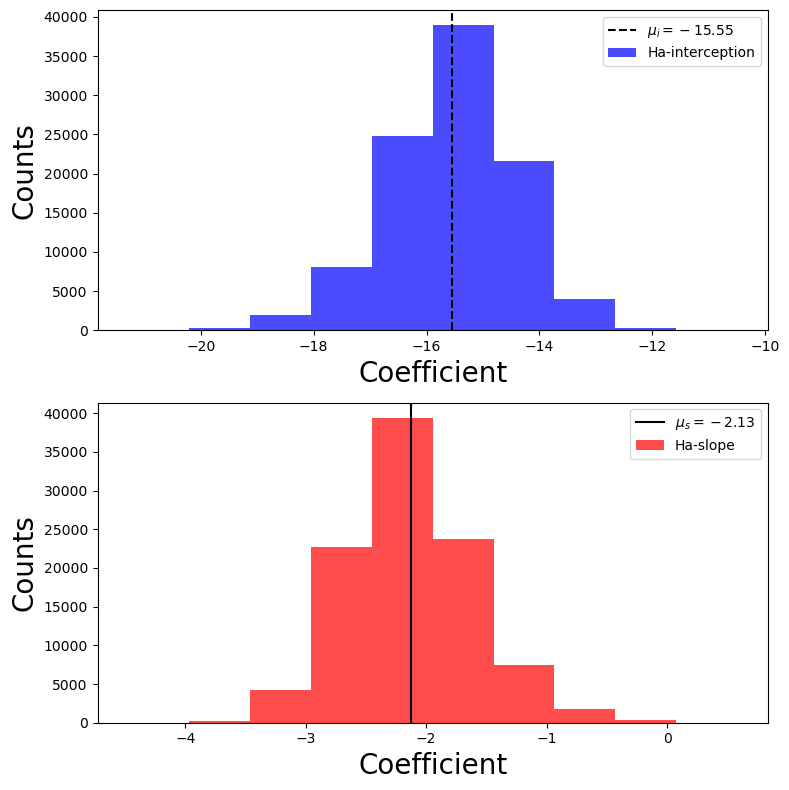

In [116]:
fig = plt.figure(1,figsize=(8,8))
plt.subplot(211)
plt.hist(w_HA_i,color='b',alpha=0.7,label='Ha-interception')
plt.axvline(x=w_HA_i.mean(),c='k',ls='--',label=r'$\mu_i = {:.2f}$'.format(w_HA_i.mean()))

plt.xlabel('Coefficient',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.legend()


plt.subplot(212)
plt.hist(w_HA_s,color='r',alpha=0.7,label='Ha-slope')
plt.axvline(x=w_HA_s.mean(),c='k',ls='-',label=r'$\mu_s = {:.2f}$'.format(w_HA_s.mean()))

plt.xlabel('Coefficient',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.legend()

plt.tight_layout()
plt.savefig('Histogram of Ha sig dv',dpi=400)

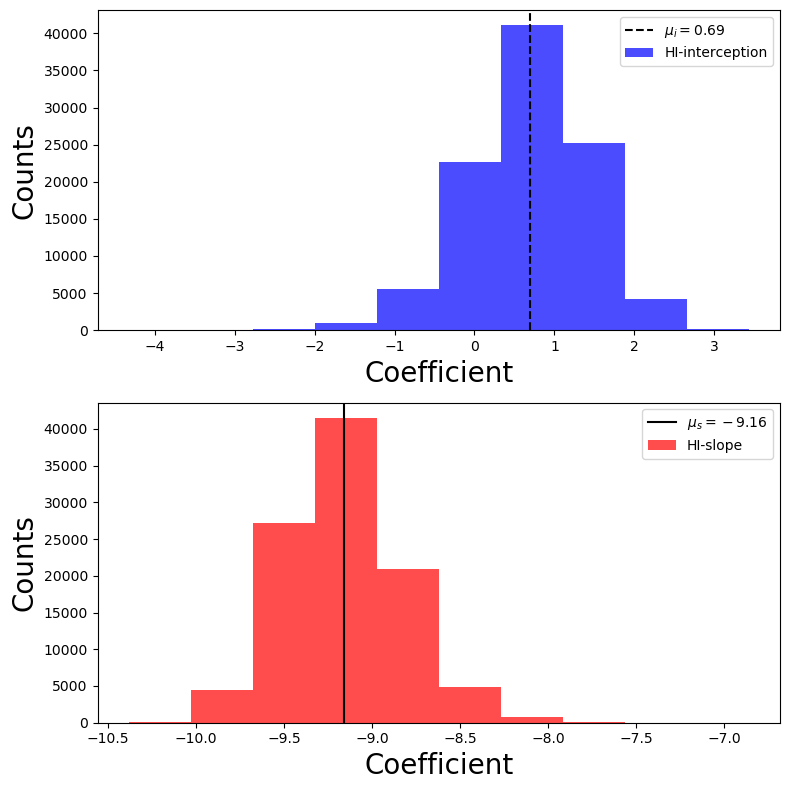

In [117]:
fig = plt.figure(1,figsize=(8,8))
plt.subplot(211)
plt.hist(w_HI_i,color='b',alpha=0.7,label='HI-interception')
plt.axvline(x=w_HI_i.mean(),c='k',ls='--',label=r'$\mu_i = {:.2f}$'.format(w_HI_i.mean()))

plt.xlabel('Coefficient',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.legend()


plt.subplot(212)
plt.hist(w_HI_s,color='r',alpha=0.7,label='HI-slope')
plt.axvline(x=w_HI_s.mean(),c='k',ls='-',label=r'$\mu_s = {:.2f}$'.format(w_HI_s.mean()))

plt.xlabel('Coefficient',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.legend()

plt.tight_layout()
plt.savefig('Histogram of HI sig dv ',dpi=400)

In [118]:
print('Mean slope of total = ' , w_s.mean())
print('STD slope of total = ' , w_s.std())
print('*'*50)

print('Mean interception of total = ' , w_i.mean())
print('STD interception of total = ' , w_i.std())
print('*'*50)


print('Mean slope of Ha = ' , w_HA_s.mean())
print('STD slope of Ha = ' , w_HA_s.std())
print('*'*50)

print('Mean interception  of Ha = ' , w_HA_i.mean())
print('STD interception  of Ha = ' , w_HA_i.std())
print('*'*50)


print('Mean slope of HI = ' , w_HI_s.mean())
print('STD slope of HI = ' , w_HI_s.std())
print('*'*50)


print('Mean interception of HI = ' , w_HI_i.mean())
print('STD interception  of Ha = ' , w_HI_i.std())
print('*'*50)


Mean slope of total =  -5.140296272322043
STD slope of total =  0.7087940119343928
**************************************************
Mean interception of total =  -8.728703498209164
STD interception of total =  1.54341755829063
**************************************************
Mean slope of Ha =  -2.130133567052003
STD slope of Ha =  0.5234127958176523
**************************************************
Mean interception  of Ha =  -15.54823776630896
STD interception  of Ha =  1.126750699972061
**************************************************
Mean slope of HI =  -9.158307979550283
STD slope of HI =  0.3313916322647362
**************************************************
Mean interception of HI =  0.6902397802184573
STD interception  of Ha =  0.7425379942651883
**************************************************


Hl slope 3.6633231918201132
Ha slope 0.8520534268208012
Total slope 2.0561185089288174


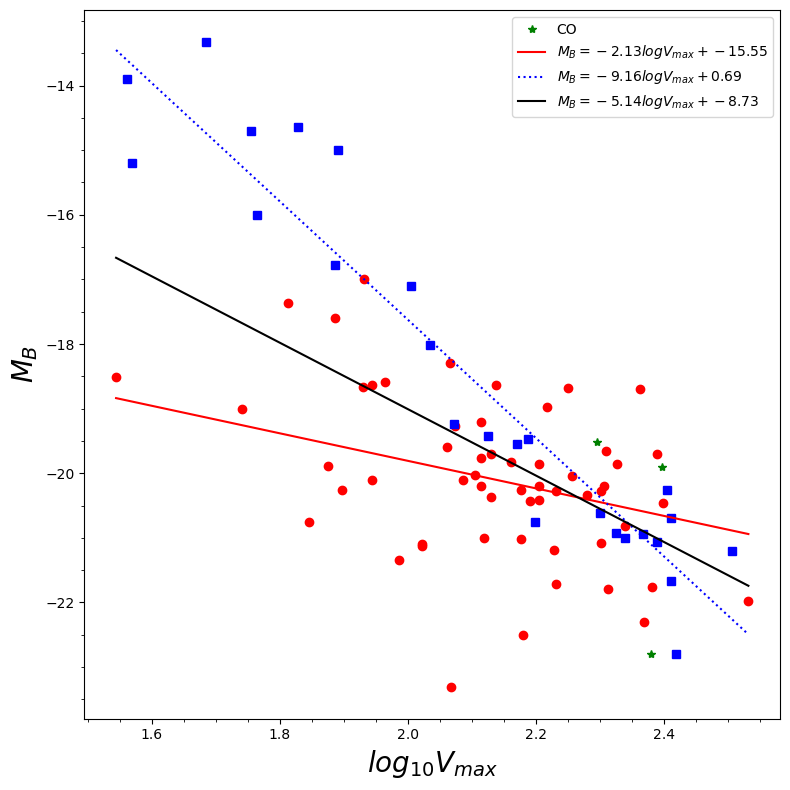

In [119]:
fig = plt.figure(1,figsize=(8,8))

plt.plot(np.log10(V_max_HA), M_B_HA,'ro')
plt.plot(np.log10(V_max_HI), M_B_HI,'bs')
plt.plot(np.log10(V_max_CO), M_B_CO,'g*',label='CO')

xx = np.linspace(np.log10(V_max).min() ,np.log10(V_max).max(),100)
yy_HA = xx *w_HA_s.mean() + w_HA_i.mean()
yy_HI = xx *w_HI_s.mean() + w_HI_i.mean()
yy = xx *w_s.mean() + w_i.mean()

plt.plot(xx,yy_HA,'r-',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w_HA_s.mean() ,'{max}',w_HA_i.mean()))
plt.plot(xx,yy_HI,'b:',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w_HI_s.mean() ,'{max}',w_HI_i.mean()))
plt.plot(xx,yy,'k',label=r'$M_B = {:.2f}logV_{} +{:.2f}$'.format(w_s.mean() ,'{max}',w_i.mean()))
plt.xlabel(r'$log_{10}V_{max}$',fontsize=20)
plt.ylabel(r'$M_B$',fontsize=20)
plt.legend()

print('Hl slope',w_HI_s.mean() /(-2.5))
print('Ha slope',w_HA_s.mean() /(-2.5))
print('Total slope',w_s.mean() /(-2.5))
plt.minorticks_on()
plt.tight_layout()

plt.savefig('Resolut of TF regard error s dv',dpi=400)